### Loading the libraries and dataset

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
Dataset = pd.read_csv("imdb.csv")

### 1. How many different Genre of Movies are there in this dataset?

In [13]:
movie_tbl = Dataset[['name','genre','duration','votes','gross_income']]
movie_tbl = movie_tbl.assign(genre=movie_tbl.genre.str.split(",")).explode("genre")
movie_tbl['genre'].unique()
movie_tbl["genre"]=movie_tbl["genre"].map(lambda x: x.replace(" ", ""))
movie_tbl['genre'].replace('Music','Musical',inplace=True)
movie_tbl['genre'].nunique()

25

### 2. Find the most voted Movie in the dataset

In [14]:
movie_tbl["name"].loc[movie_tbl["votes"]==movie_tbl["votes"].max()].values[0]

'Running Scared'

### 3. Which Genre is having most number of Movies in the dataset?

In [15]:
movie_tbl["genre"].value_counts().idxmax()

'Drama'

### 4. Find the Distribution of number of movies in each genre with bar graph

<AxesSubplot:>

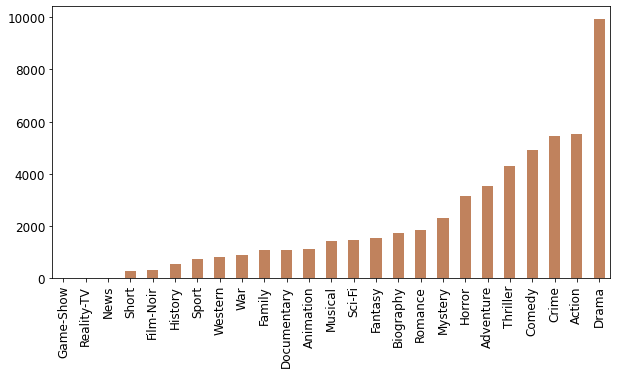

In [16]:
movie_tbl.genre.value_counts().sort_values(ascending=True).plot(color="#C0825D",kind="bar",figsize=(10, 5),fontsize=12)

### 5. Plot top 10 Movies with maximum Gross-Income with Bar Graph

Text(0.5, 1.0, 'Top 10 Movies with Maximum Income')

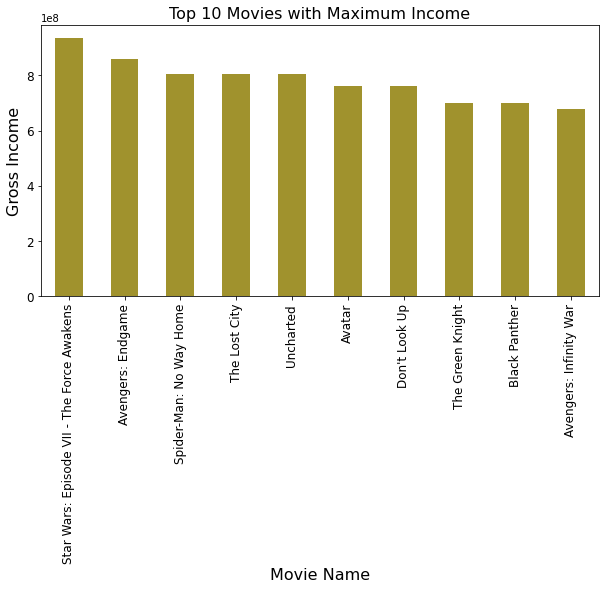

In [17]:
for i in ["M","$",","]:
    movie_tbl["gross_income"]=movie_tbl["gross_income"].map(lambda x: x.replace(i, ''))
movie_tbl["gross_income"]=movie_tbl["gross_income"].astype("float64") 
movie_tbl.groupby(['name'])['gross_income'].max().sort_values(ascending=False)[:10].plot(color="#A0922D",figsize=(10, 5),kind = "bar",fontsize=12)
plt.xlabel("Movie Name", fontsize=16)
plt.ylabel("Gross Income", fontsize=16)
plt.title("Top 10 Movies with Maximum Income", fontsize=16)

### 6. Whats the average duration of a movie in each genre in ascending order?

Text(0.5, 1.0, 'Average Duration of Genre')

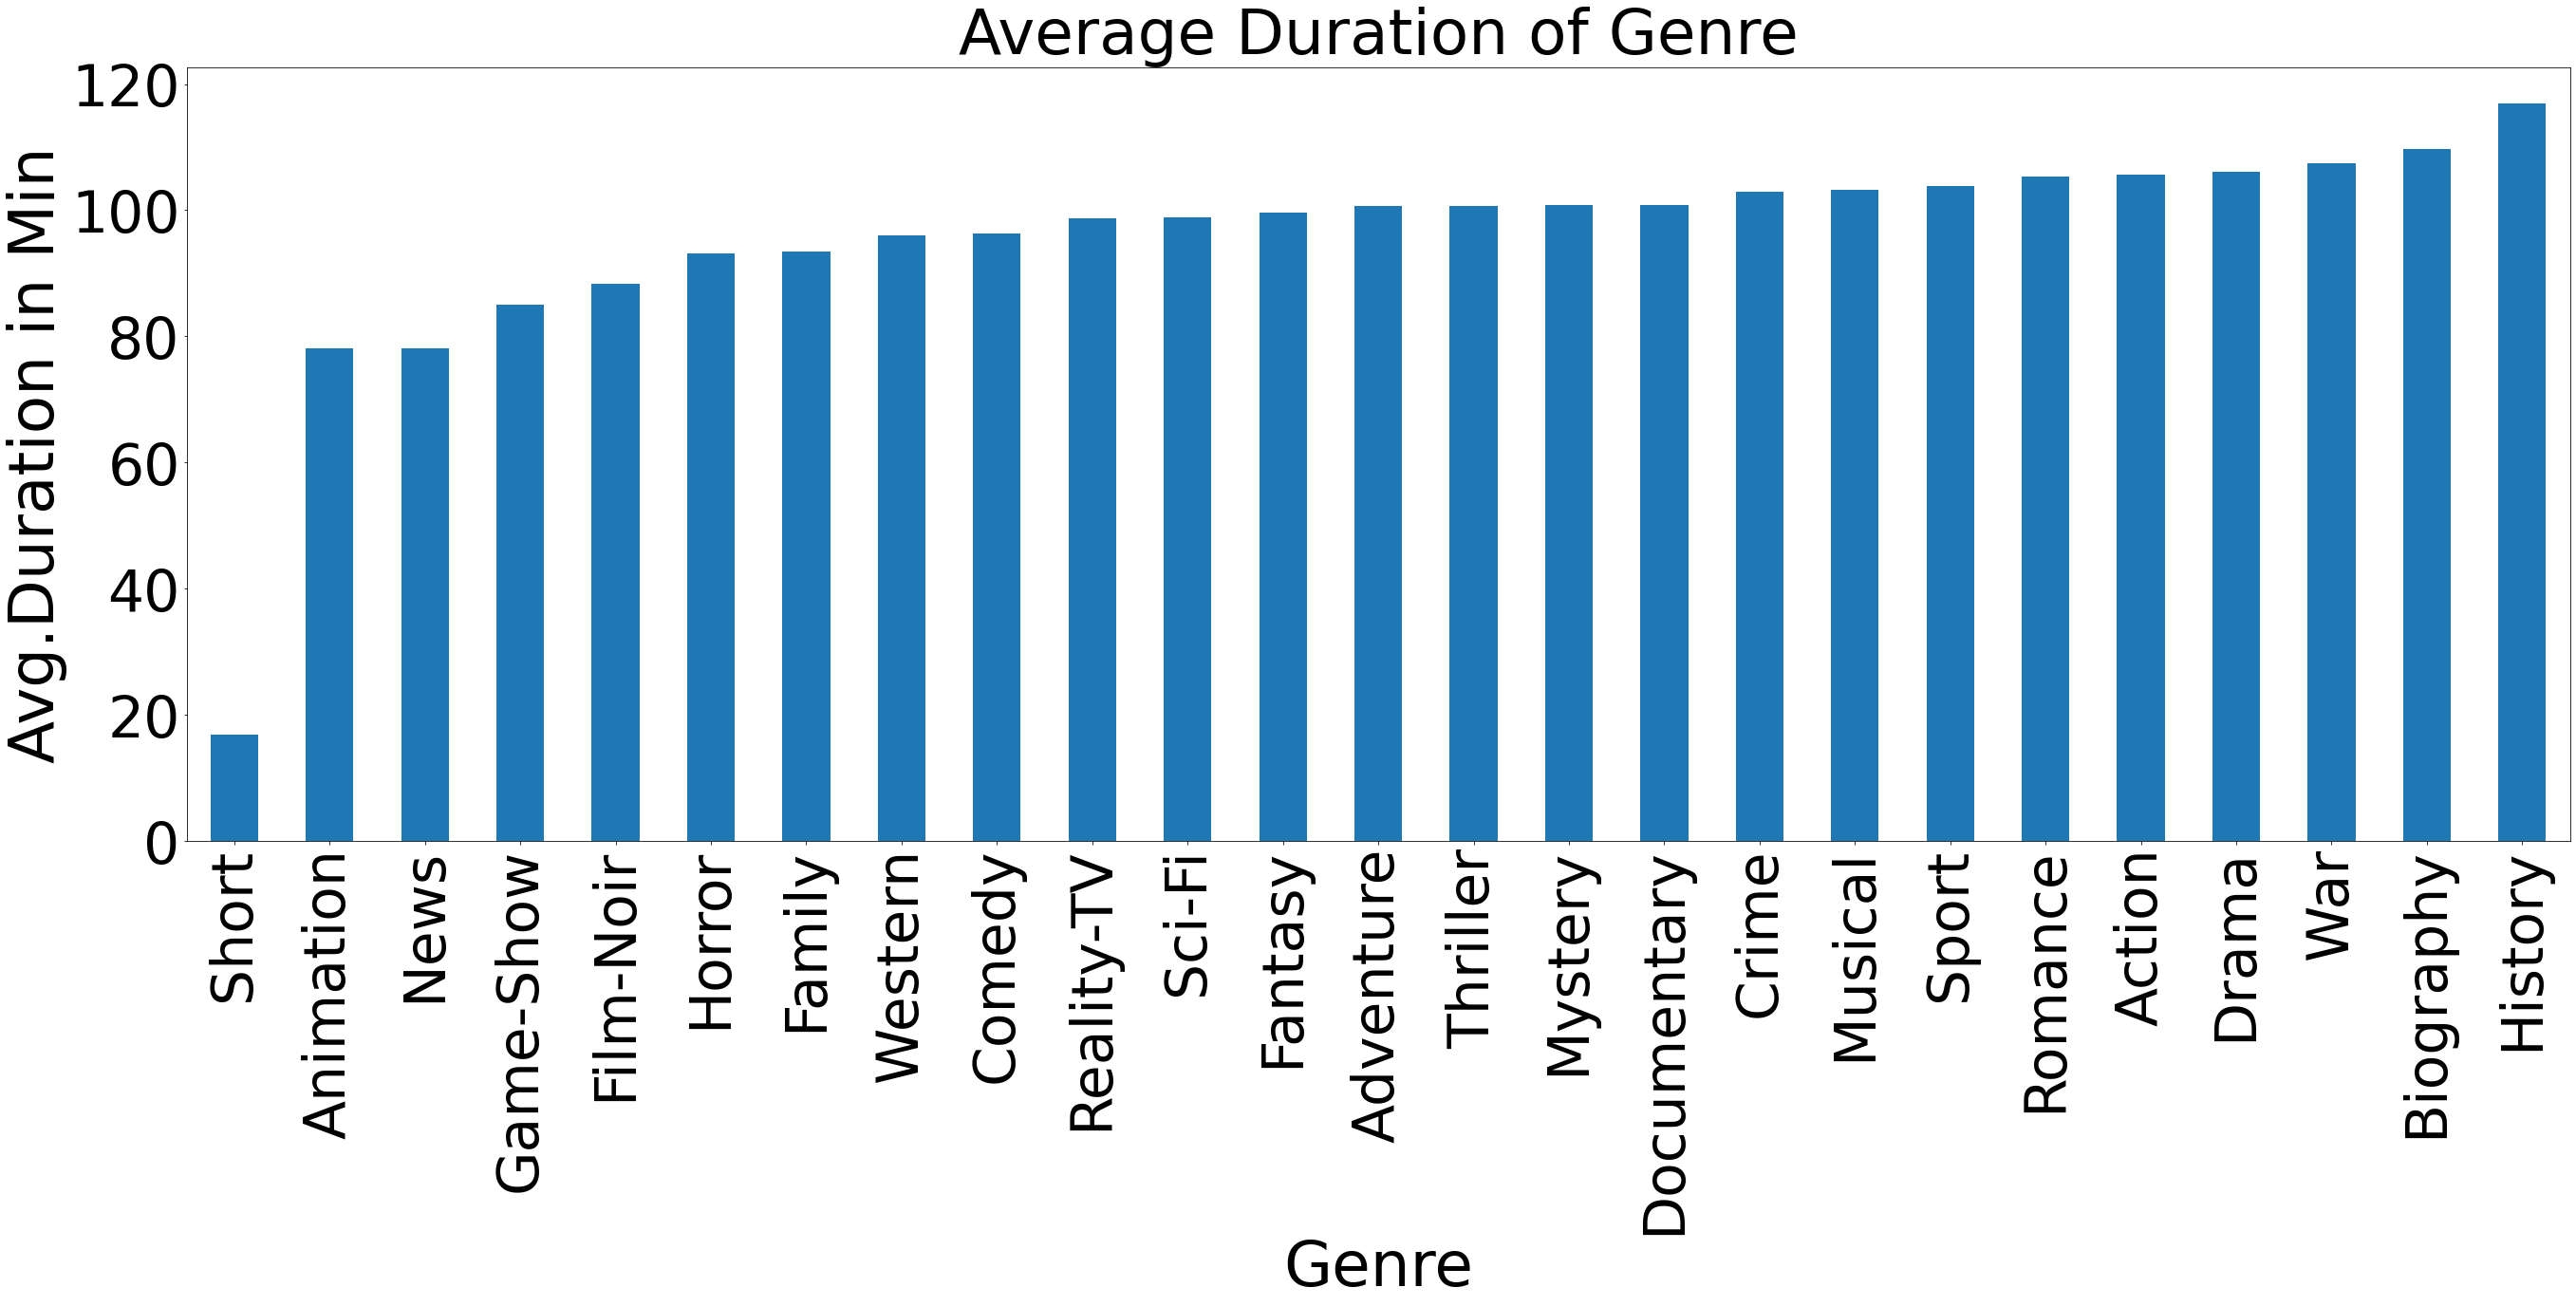

In [18]:
for i in [' min',","]:
    movie_tbl["duration"]=movie_tbl["duration"].map(lambda x: x.replace(i, ''))
movie_tbl["duration"]=movie_tbl["duration"].astype("int") 
movie_tbl.groupby(['genre'],sort=True)['duration'].mean()
movie_tbl.groupby(['genre'])['duration'].mean().sort_values(ascending=True).plot(figsize=(45, 15),kind = "bar",fontsize=60)
plt.xlabel("Genre", fontsize=66)
plt.ylabel("Avg.Duration in Min", fontsize=66)
plt.title("Average Duration of Genre", fontsize=66)

### 7. Which Genre is the best to make a movie to get maximum gross income?

In [19]:
movie_tbl.groupby(['genre'])['gross_income'].mean().idxmax()

'Adventure'

### 8. Which Genre is the worst to make money from a movie?

In [20]:
movie_tbl.groupby(['genre'])['gross_income'].mean().idxmin()

'News'

### 9. Distribution of Average Gross Income of each genre?

Text(0.5, 1.0, 'Average Gross Income of Genre')

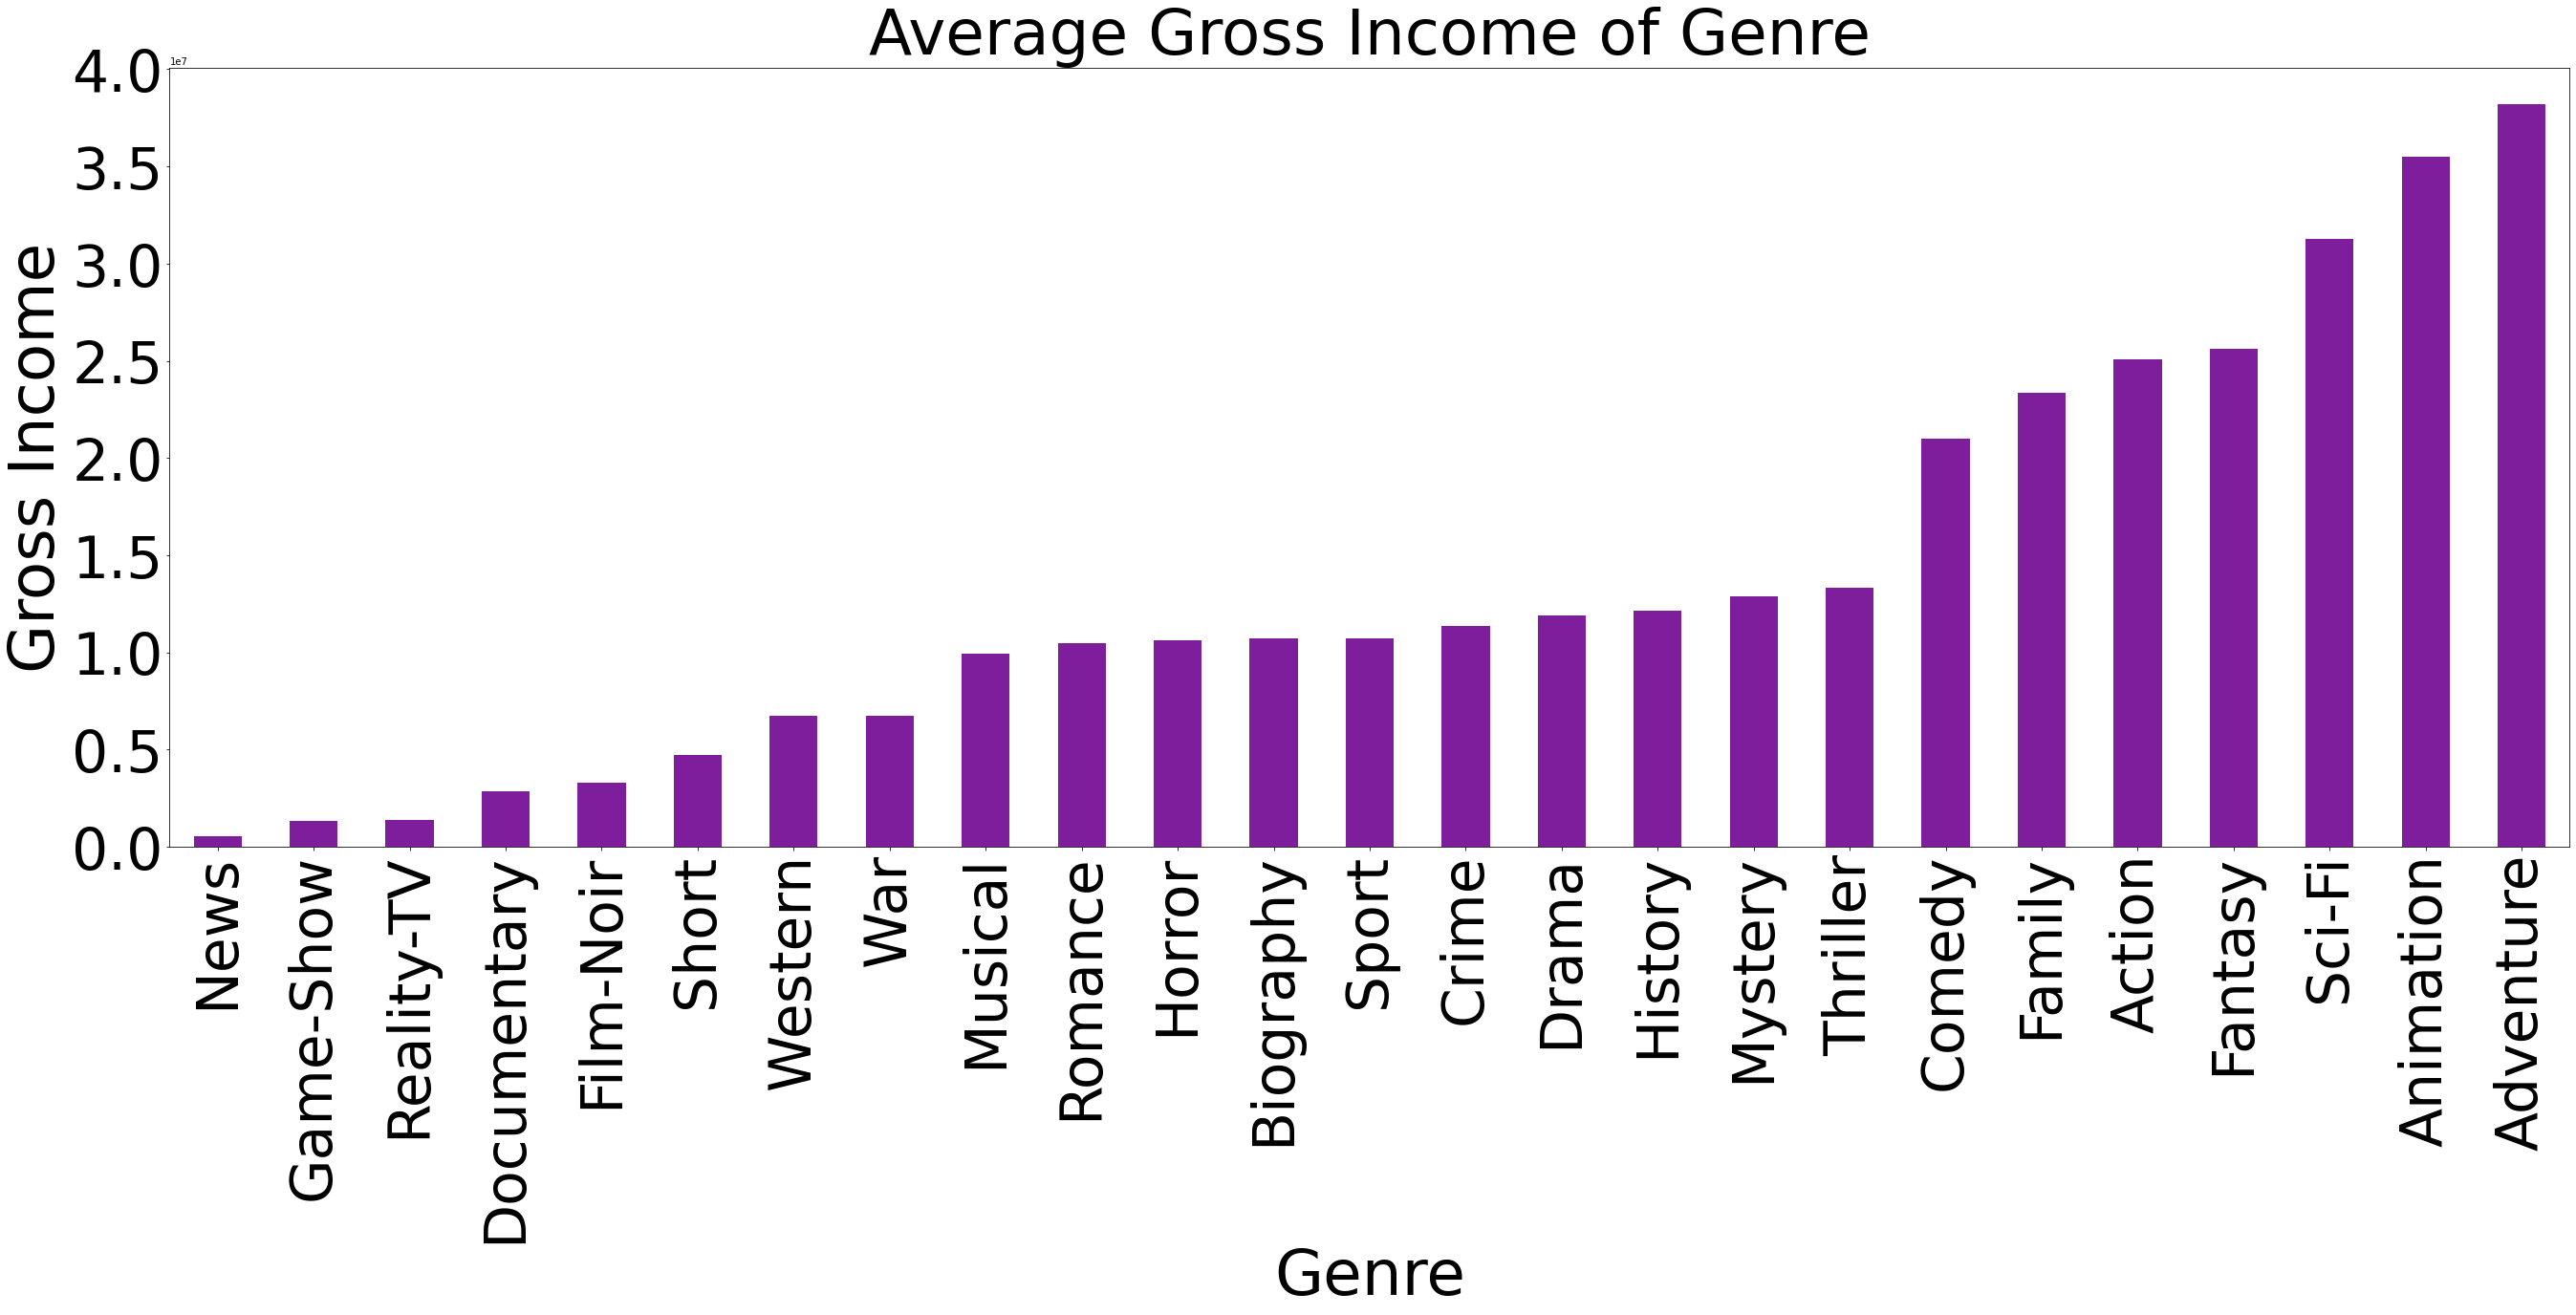

In [21]:
movie_tbl.groupby(['genre'])['gross_income'].mean().sort_values(ascending=True).plot(color="#7E1E9C",figsize=(45, 15),kind = "bar",fontsize=60)
plt.xlabel("Genre", fontsize=66)
plt.ylabel("Gross Income", fontsize=66)
plt.title("Average Gross Income of Genre", fontsize=66)

### 10. Which two pairs of Genre is having maximum number of movies?

In [22]:
genre_dict={}
for i in movie_tbl["name"].unique():
    genre_lst=list(movie_tbl.genre.loc[movie_tbl.name==i])
    if len(genre_lst)==2:
        genre_txt=",".join(genre_lst)
        if genre_txt in genre_dict:
            genre_dict[genre_txt] += 1
        else:
            genre_dict[genre_txt] = 1
max(zip(genre_dict.values(), genre_dict.keys()))[1]

'Crime,Drama'